# Linear Regression

y = wx + b

SSE(sum of squared errors) min: W = arg min((Y - WX)^2)

MSE (mean squared error) MSE: loss = 1/2m (XW - Y)^T (XW-Y)

d_loss / d_w = 1/m X^T (XW - Y)

use the gradient descent as follows:

W := -alpha 1/m * X^T (XW - Y)
b := -alpha 1/m * 1 * (XW - Y)

In [1]:
import numpy as np

class LinearRegression:
    def __init__(self, iter=100, lr=.1):
        super().__init__()
        self.iter = iter
        self.lr = lr
        self.weights = None
        self.bias = None
        
    def _weight_initialization(self, feature_num):
        self.weights = np.zeros(feature_num)
        self.bias = 0.
        
    def _gradient_descent(self, X, y, y_pred):
        sample_num = X.shape[0]
        dw = (1/sample_num) * np.dot(X.T, (y_pred - y))
        db = (1/sample_num) * np.sum(y_pred - y)
        self.weights -= self.lr * dw
        self.bias -= self.lr * db
        return 
    
    def fit(self, X, y):
        sample_num, feature_num = X.shape
        self._weight_initialization(feature_num)
        for _ in range(self.iter):
            y_pred = np.dot(X, self.weights) + self.bias
            self._gradient_descent(X, y, y_pred)
        return
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## Test

In [2]:
X = np.array([[1, 1], [2, 1], [3, 1], [4, 1], [5, 1]])
y = np.array([2, 4, 5, 4, 5])
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

# [0.61834151 1.06733787]
print(lr.weights)
# 1.0673378656599855
print(lr.bias)
# [2.75301724 3.37135876 3.98970027 4.60804178 5.2263833 ]
print(y_pred)

[0.61834151 1.06733787]
1.0673378656599855
[2.75301724 3.37135876 3.98970027 4.60804178 5.2263833 ]


## Vectorized Representation with Direct Solution

In [3]:
import numpy as np


class LinearRegression:
    def __init__(self):
        self.W = None

    def fit(self, X, y):
        '''
        X: n x d 
        '''
        n = X.shape[0]
        # Add bias term to X -> [1 X]
        X = np.hstack([np.ones((n, 1)), X])
        self.W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        n = X.shape[0]
        X = np.hstack([X, np.ones((n, 1))])
        return X.do(self.W)

In [4]:
# X = np.array([[1., 2.], [2., 3.], [7., 8.]]) # singular matrix
# y = np.array([3., 5., 15.])
# Create example input data
X = np.array([[1., 2.], [2., 3.], [7., 8.], [7.,9.]])  # non-singular matrix
y = np.array([3., 4., 15., 16.])
lr = LinearRegression()
lr.fit(X, y)
print(lr.W)
print(y_pred)

[-0.64516129  0.96774194  1.09677419]
[2.75301724 3.37135876 3.98970027 4.60804178 5.2263833 ]


# Follow Up

Add input validation: Add input validation to check that the input arrays X and y have the same length and are not empty.

Use NumPy broadcasting: Instead of looping through the data to calculate the numerator and denominator, we can use NumPy broadcasting to perform the calculations in a vectorized way. This will make the code faster and more efficient.

Add regularization: Regularization can help prevent overfitting by adding a penalty term to the cost function. One common regularization technique is L2 regularization, which adds the sum of squares of the coefficients to the cost function. This can be easily added to the code by adding a regularization parameter to the constructor.

Use gradient descent: For large datasets, calculating the inverse of the matrix in the normal equation can be computationally expensive. To overcome this, we can use gradient descent to minimize the cost function. This can be implemented by adding a method that updates the coefficients iteratively using the gradient descent algorithm.

In [5]:
import numpy as np


class LinearRegressionGD:
    def __init__(self, regul=0):
        self.regul = regul
        self.W = None

    def fit(self, X, y, lr=0.01, num_iter=1000):
        # Input validation
        if len(X) != len(y) or len(X) == 0:
            raise ValueError("X and y must have the same length and cannot be empty")
        
        # Add bias term to X -> [1 X]
        X = np.hstack([np.ones((len(X), 1)), X])

        # Initialize W to zeros
        self.W = np.zeros(X.shape[1])

        # Use gradient descent to minimize cost function
        for i in range(num_iter):
            # Calculate predicted values
            y_pred = np.dot(X, self.W)

            # Calculate cost function
            cost = np.sum((y_pred - y) ** 2) + self.regul * np.sum(self.W ** 2)

            # Calculate gradients
            gradients = 2 * np.dot(X.T, (y_pred - y)) + 2 * self.regul * self.W

            # Update W
            self.W = self.W - lr * gradients

            if (i % 1000 == 0 ): print(cost)

    def predict(self, X):
        # Add bias term to X
        X = np.hstack([np.ones((len(X), 1)), X])

        # Calculate predicted values
        y_pred = np.dot(X, self.W)
        return y_pred

In [6]:
X = np.array([[1, 2, 3, 4, 5]]).T
y = np.array([2, 4, 5, 4, 5])
lr = LinearRegressionGD(regul=0.1)
lr.fit(X, y, lr=0.01, num_iter=10000)
print(lr.W)  # Output: [ 1.99964292  0.65345474 ]
y_pred = lr.predict(X)
print(y_pred)  # # Output: [2.65309766, 3.3065524, 3.96000714, 4.61346188, 5.26691662]

86.0
2.8791287270130335
2.8791287270130344
2.8791287270130344
2.8791287270130344
2.8791287270130344
2.8791287270130344
2.8791287270130344
2.8791287270130344
2.8791287270130344
[1.99964292 0.65345474]
[2.65309766 3.3065524  3.96000714 4.61346188 5.26691662]


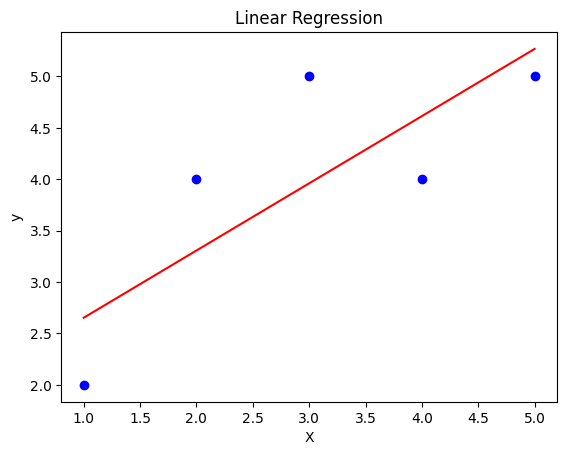

In [7]:
import matplotlib.pyplot as plt 

# Plot the data and the linear regression line
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

# Multi-Dimension Linear Regression

In [8]:
import numpy as np
import random

n, k, p=100, 8, 2
X=np.random.random([n,k])
W=np.random.random([k,p])
Y=np.random.random([n,p])
max_itr=1000
alpha=0.001
Lambda=0.01

F(X) = X W   
gradient = 2 X.T (Y_hat) + 2 Lambda W

In [9]:
# F(x)= w[0]*x + w[1]
def F(X, W):
    return np.matmul(X,W)

def cost(Y_est, Y, W, Lambda):
    E=Y_est-Y
    return E, np.linalg.norm(E,2)+ Lambda * np.linalg.norm(W,2)

def gradient(E,X, W, Lambda):
    return 2* np.matmul(X.T, E) + Lambda* 2* W

In [10]:
def fit(W, X, Y, alpha, Lambda, max_itr):
    for i in range(max_itr):
        
        Y_est=F(X,W)
        E, c= cost(Y_est, Y, W, Lambda)
        Wg=gradient(E, X, W, Lambda)
        W=W - alpha * Wg
        if i%100==0:
            print(c)
        
    return W

In [11]:
X=np.concatenate( (X, np.ones((n,1))), axis=1 ) 
W=np.concatenate( (W, np.random.random((1,p)) ), axis=0 )

W = fit(W, X, Y, alpha, Lambda, max_itr)

40.19639826326441
3.02850553065586
2.9171753071545212
2.888084292961416
2.877659728536121
2.8737351739769834
2.872265346591553
2.871733799980027
2.8715562632046545
2.871507563769664


In [12]:
Y_pred = F(X, W)

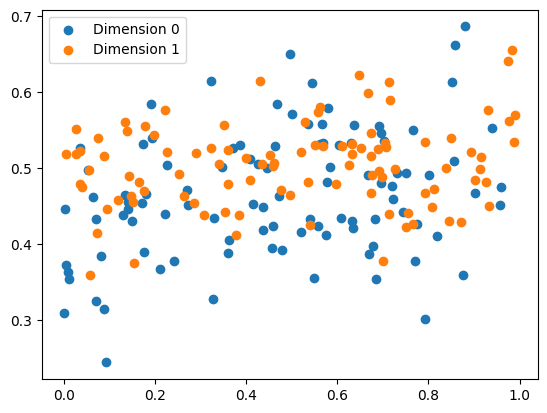

In [13]:
import matplotlib.pyplot as plt

for i in range(Y_pred.shape[1]):
    plt.scatter(Y[:, i], Y_pred[:, i], label=f'Dimension {i}')

plt.legend()